In [ ]:
'''Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию'''

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [92]:
from sklearn.datasets import load_iris

In [95]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()#Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [135]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.columns
variety=iris.target

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [137]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [138]:
data =data.iloc[:,0:2] #Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [139]:
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [140]:
data.describe()

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [141]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [142]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [143]:
lda = LinearDiscriminantAnalysis()

In [144]:
# обучаем данные.Строим модель LDA
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [145]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1])

In [146]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [75]:
result

,0,1
0,2,2
1,0,0
2,0,0
3,2,1
4,0,0
5,2,1
6,0,0
7,1,2
8,0,0
9,1,1


In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_test, lda.predict(X_test))# рассчитываем точность прогноза, используя метрику accuracy

0.8157894736842105

In [149]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.7938292 ,  6.99932738],
       [ 1.75429256, -3.25224584],
       [ 4.11999936, -3.68243655]])

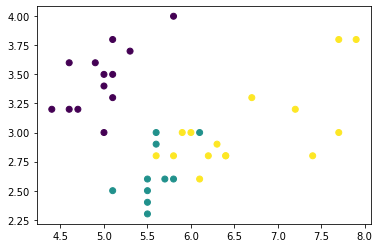

In [158]:
# визуализируем дискриминантную линию для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.show()

In [159]:
#оставляем 2 параметра из 3х для визуализации
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

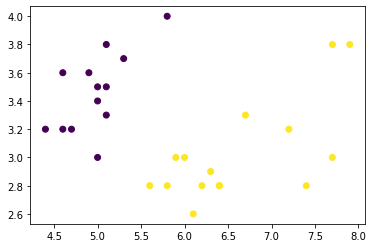

In [161]:
#Визуализируем предсказания для тестовой выборки
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
plt.show()

In [162]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [163]:
# посмотрим на наши центроиды
lda_small.means_

array([[5.01891892, 3.41621622],
       [6.57428571, 2.95142857]])

<ipython-input-164-df1ec49f2892>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


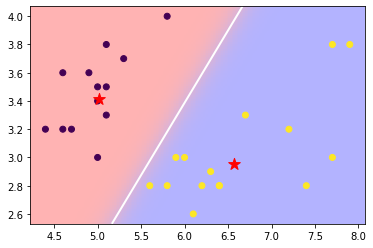

In [164]:
# сам scatter plot
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
# визуализируем центроиды (центры классов)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [165]:
lda_small.coef_

array([[ 10.57592387, -10.31837083]])

In [166]:
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [120]:
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.cluster import KMeans

In [100]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

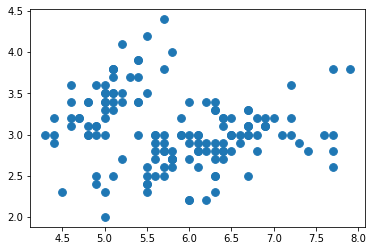

In [107]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', s=60)

In [108]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
# fit-transform сразу обучается и преобразует данные
data_scaled = scaler.fit_transform(data)

In [111]:
data_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [112]:
from sklearn.cluster import KMeans

In [113]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

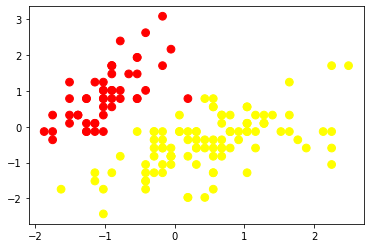

In [114]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [115]:
# строим график локтя (график каменистой осыпи)

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

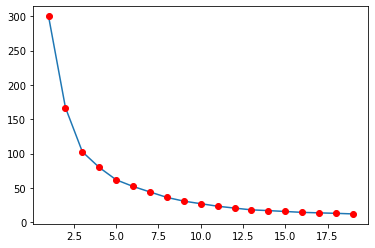

In [116]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
# В соответствии с графиком выбираем количество кластеров равное 3.

In [167]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

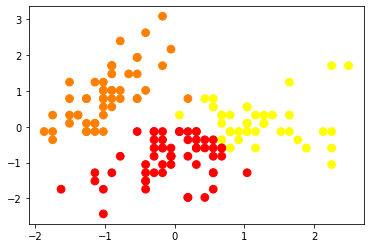

In [168]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)